# Изучение рынка заведений общественного питания Москвы

- Автор: Волкова Карина
- Дата:  24.03.2025
  

### Цели и задачи проекта

**Цель:** Провести исследовательский анализ рынка Москвы. Эти результаты помогут в выборе подходящего инвесторам места для открытия заведения общественного питания.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных.
- Какие категории заведений представлены?
- Какие административные районы Москвы присутствуют в данных?
- Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми?
- Исследовать количество посадочных мест в заведениях.
- Рейтинг заведений.
- С какими данными показывают самую сильную корреляцию рейтинги заведений?
- Топ-15 популярных сетей в Москве.
- Вариации среднего чека заведения (столбец middle_avg_bill) в зависимости от района Москвы.
4. Сформулировать выводы по проведённому анализу.

### Описание данных
Для анализа поступили данные, состоящие из двух датасетов:

<font color='#777778'>  Файл **/datasets/rest_info.csv** содержит информацию о заведениях общественного питания:
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
- - `0` — заведение не является сетевым;
- - `1` — заведение является сетевым.
- `seats`— количество посадочных мест.

Файл **/datasets/rest_price.csv** содержит информацию о среднем чеке в заведениях общественного питания:
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
- - «Средний счёт: 1000–1500 ₽»;
- - «Цена чашки капучино: 130–220 ₽»;
- - «Цена бокала пива: 400–600 ₽».
и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
- - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
- - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
- - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
- - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
- - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
- - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт. </font>

### Содержимое проекта

1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных.
4. Сформулировать выводы по проведённому анализу.
---

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install phik
from phik import phik_matrix 

In [2]:
inform = pd.read_csv('')
prices = pd.read_csv('')

- Познакомьтесь с данными и изучите общую информацию о них.

In [3]:
inform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [4]:
inform.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [6]:
prices.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


---

### Промежуточный вывод


Датасет INFORM содержит 9 колонок, 8406 записей, 3х типов данных:
- object (строковые данные): 6 столбцов (id, name, category, address, district, hours)
- float64: 2 столбца (rating, seats)
- int64: 1 столбец (chain)
 
Пропуски: 
- Столбец hours: 7870 ненулевых значений, 536 записей содержат пропуски.
- Столбец seats: 4795 ненулевых значений, 3611 записей содержат пропуски.

Значения данных соответсвуют типам, за исключением:
- Столбец hours может потребовать преобразования в категориальный тип для анализа.
- Столбец seats: тип float64 лучше привести к целочисленному типу.
---

Датасет PRICES содержит 5 колонок, 4058 записей, 2х типов данных:
- object (строковые данные): 3 столбца (id, price, avg_bill)
- float64: 2 столбца (middle_avg_bill, middle_coffee_cup)
  
Пропуски:
- Столбец price: 3315 ненулевых значений, 743 записи содержат пропуски.
- Столбец avg_bill: 3816 ненулевых значений, 242 записи содержат пропуски.
- Столбец middle_avg_bill: 3149 ненулевых значений, 909 записей содержат пропуски.
- Столбец middle_coffee_cup: 535 ненулевых значений, 3523 записи содержат пропуски.
 
Значения данных соответсвуют типам, за исключением:
- Столбец price: Строковый тип, что может указывать на то, что цены представлены в виде текста. Здесь категориальный тип.
- Столбец avg_bill: Также строковый тип, что может потребовать преобразования в числовой формат.
- Столбец middle_avg_bill: Тип float64 подходит для числовых значений, но можно привести к целочисленному типу.
- Столбец middle_coffee_cup: Тип float64 подходит для числовых значений, но можно привести к целочисленному типу.

---

Названия столбцов обоих датасетов не требуют преобразований.

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [7]:
df = inform.merge(prices, on='id', how='left')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [9]:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.
- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [10]:
# пропуски 
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [11]:
# доля пропусков в hours
df['hours'].isna().sum()/len(df) *100

6.376397811087318

Доля пропусков в hours 6,37%


In [12]:
# доля пропусков в seats
df['seats'].isna().sum()/len(df) *100

42.95741137282893

Приведем seats к целочисленному типу:

In [13]:
df['seats'] = df['seats'].fillna(0).astype('int64')

In [14]:
# доля пропусков в price
df['price'].isna().sum()/len(df) *100

60.5638829407566

In [15]:
# доля пропусков в avg_bill
df['avg_bill'].isna().sum()/len(df) *100

54.603854389721626

In [16]:
# доля пропусков в middle_avg_bill
df['middle_avg_bill'].isna().sum()/len(df) *100

62.538662859862

In [17]:
# доля пропусков в middle_coffee_cup
df['middle_coffee_cup'].isna().sum()/len(df) *100

93.63549845348561

Оставим пропуски без изменений, чтобы не искажать данные.

- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [48]:
# Проверяем неявные дубликаты в датафрейме bank_df
df.duplicated(subset='id').sum() 

0

In [49]:
# Проверяем полные дубликаты в датафрейме bank_df
df.duplicated().sum() 

0

In [20]:
# все названия в нижний регистр, пробелы заменены на _:
# Нормализация столбцов name и address
df['name'] = df['name'].str.strip().str.lower().str.replace(' ', '_')
df['address'] = df['address'].str.strip().str.lower().str.replace(' ', '_')

In [21]:
# Проверяем уникальные значения в категориальных столбцах
for column in ['name', 'address']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())

Уникальные значения в столбце name:
['#кешбэккафе' '+39_pizzeria_mozzarella_bar' '1-я_креветочная' ...
 'ё-ланч' 'ёж_и_устрица' 'ёрш']
Уникальные значения в столбце address:
['москва,_1-й_автозаводский_проезд,_5'
 'москва,_1-й_балтийский_переулок,_3/25'
 'москва,_1-й_варшавский_проезд,_1ас9' ...
 'москва,_яузский_бульвар,_11,_стр._1' 'москва,_яузский_бульвар,_14/8'
 'москва,_№_7']


В данных присутствуют дубликаты: 318 неявных, 307 явных.

In [22]:
# удалим дубли
df.drop_duplicates(subset=None, keep='first', inplace=True)

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [23]:
df['is_24_7'] = df['hours'].str.contains('ежедневно, круглосуточно', case=False, na=False)

In [24]:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва,_улица_дыбенко,_7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,0,NaN,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,четыре_комнаты,ресторан,"москва,_улица_дыбенко,_36,_корп._1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва,_клязьминская_улица,_15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse_coffee_shop,кофейня,"москва,_улица_маршала_федоренко,_12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль_марко,пиццерия,"москва,_правобережная_улица,_1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN,False


---

### Промежуточный вывод



В результате предобработки данных были выполнены следующие действия:

Изучены пропуски в данных.  Пропуски обнаружились в столбце hours и составляют около 6,37% данных столбца. В столбцах seats, price, avg_bill, middle_avg_bill и middle_coffee_cup пропуски в значительном количестве. Все пропуски оставлены в исходном виде, чтобы не исказить данные.

Данные проверили на явные и неявные дубликаты, и дубликаты были удалены. Названия заведений и их адреса были приведены к единому виду, для удобства.

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [25]:
# Подсчет количества объектов по каждой категории
category_counts = df['category'].value_counts()
category_counts

кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

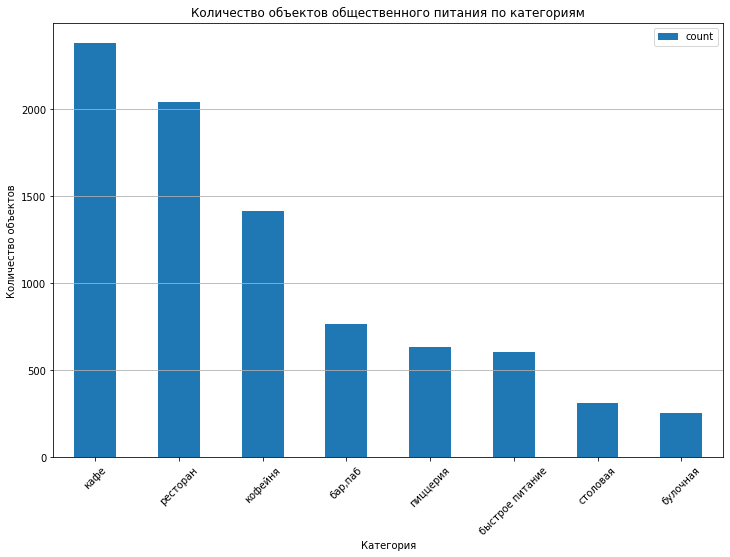

In [26]:
# Создание нового DataFrame для визуализации
category_df = category_counts.reset_index()
category_df.columns = ['category', 'count']

# Визуализация результатов
category_df.plot.bar(x='category', y='count', figsize=(12, 8), title='Количество объектов общественного питания по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество объектов')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

- Кафе (2378): Наиболее распространенный тип заведения. Это может свидетельствовать о высоком спросе на неформальные места для встреч и общения.

- Ресторан (2043): Также занимает значительную долю рынка, однако немного уступает кафе.

- Кофейня (1413): Высокий интерес к кофе, что отражает культурные привычки потребителей и растущее популярность кофеен как мест для работы и общения.
- Бар, паб (765): Популярны среди молодежи и в вечерние часы, что делает их важной частью ресторанного рынка.
- Пиццерия (633): Специфическая категория, которая, вероятно, привлекает большую целевую аудиторию благодаря популярности пиццы.
- Быстрое питание (603): Важная категория для тех, кто ценит скорость и удобство.
- Столовая (315): Меньшая доля, что указывает на снижающийся интерес к традиционным столовым.
- Булочная (256): Самая низкая цифра, что может говорить либо о низком спросе, либо о высокой специализации в этой области.

Общее количество заведений показывает разнообразие предложений, удовлетворяющее разные потребности потребителей. Значительная доля кафе и ресторанов свидетельствует о культурной и социальной активности населения, в то время как рост числа кофеен указывает на изменения в привычках потребителей. Менее популярные категории, такие как столовые и булочные, могут требовать пересмотра подходов к предложению и маркетингу для повышения интереса.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [27]:
df['district'] = df['district'].str.replace('административный округ','адм.окр.')

In [28]:
district_counts = df['district'].value_counts()
district_counts

Центральный адм.окр.         2242
Северный адм.окр.             900
Южный адм.окр.                892
Северо-Восточный адм.окр.     891
Западный адм.окр.             851
Восточный адм.окр.            798
Юго-Восточный адм.окр.        714
Юго-Западный адм.окр.         709
Северо-Западный адм.окр.      409
Name: district, dtype: int64

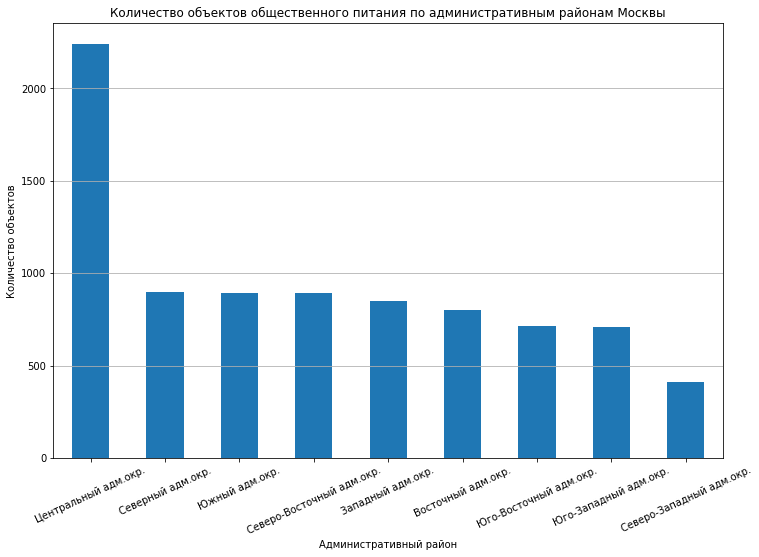

In [29]:
# Визуализация распределения заведений по административным районам
district_counts.plot.bar(figsize=(12,8), title='Количество объектов общественного питания по административным районам Москвы')
plt.xlabel('Административный район')
plt.ylabel('Количество объектов')
plt.xticks(rotation=25)
plt.grid(axis='y')
plt.show()

В Центральном административном округе наблюдается самое большое количество заведений общественного питания - 2242. Это может быть связано с высокой концентрацией населения, туристов и бизнес-центров в этом районе.

Северный, Южный и Северо-Восточный округа: Эти округа также имеют значительное количество заведений (900, 892 и 891 соответственно). Это может указывать на развитие инфраструктуры и интерес к общественному питанию в этих районах.

Восточный и Западный округа: С показателями 851 и 798, эти округа также демонстрируют активное присутствие заведений общественного питания, что может свидетельствовать о разнообразии предложений для местных жителей и гостей.

Юго-Восточный и Юго-Западный округа: С 714 и 709 заведениями, эти округа находятся на среднем уровне по сравнению с другими, что может указывать на потенциальные возможности для роста в сфере общественного питания.

In [30]:
# Фильтрация данных для Центрального административного округа
central_district = df[df['district'] == 'Центральный адм.окр.']

# Подсчет количества объектов по категориям в Центральном административном округе
central_categ_counts = central_district['category'].value_counts()
central_categ_counts

ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

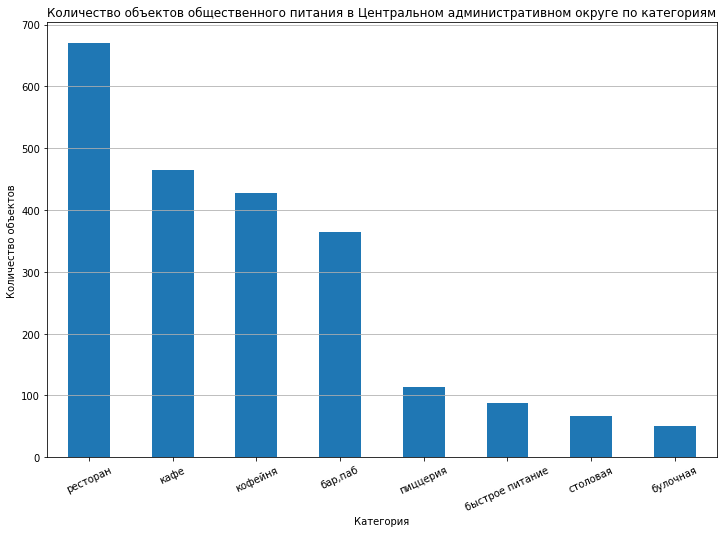

In [31]:
# Визуализация распределения заведений по категориям в Центральном административном округе
central_categ_counts.plot.bar(figsize=(12, 8), title='Количество объектов общественного питания в Центральном административном округе по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество объектов')
plt.xticks(rotation=25)
plt.grid(axis='y')
plt.show()

Лидерство по количеству объектов в Центральном округе держат рестораны - 670, что свидетельствует о высоком интересе к более формальным и разнообразным кулинарным предложениям. Это может быть связано с растущим спросом на качественную еду и обслуживание. 

Кафе - 464 также популярны, что может указывать на предпочтение потребителей к более неформальным и уютным местам для встреч и отдыха.

Кофейни (428) занимают третье место, что подчеркивает популярность кофе и культуры кофеен в целом. Это может быть связано с растущей тенденцией к потреблению кофе и необходимости в местах для работы или общения.

Бары и пабы (364) показывают значительное количество заведений, что говорит о популярности ночной жизни и досуга.

Остальные заведения  имеют меньшее количество, но все же показывают, что потребители ищут быстрые и удобные варианты питания. 

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [32]:
# Группировка и подсчет количества сетевых и несетевых заведений
chain_categ = df.groupby('category')['chain'].value_counts().unstack(fill_value=0)

# общее количество заведений в каждой категории
chain_categ['total'] = chain_categ.sum(axis=1) 
 # доля сетевых заведений
chain_categ['chain_ratio'] = chain_categ[1] / chain_categ['total'] *100
# сортировка по доле сетевых заведений
chain_categ_sorted = chain_categ.sort_values(by='chain_ratio', ascending=False)

chain_categ_sorted

chain,0,1,total,chain_ratio
category,,,,
булочная,99,157,256,61.328125
пиццерия,303,330,633,52.132701
кофейня,693,720,1413,50.955414
быстрое питание,371,232,603,38.474295
ресторан,1313,730,2043,35.731767
кафе,1599,779,2378,32.758621
столовая,227,88,315,27.936508
"бар,паб",596,169,765,22.091503


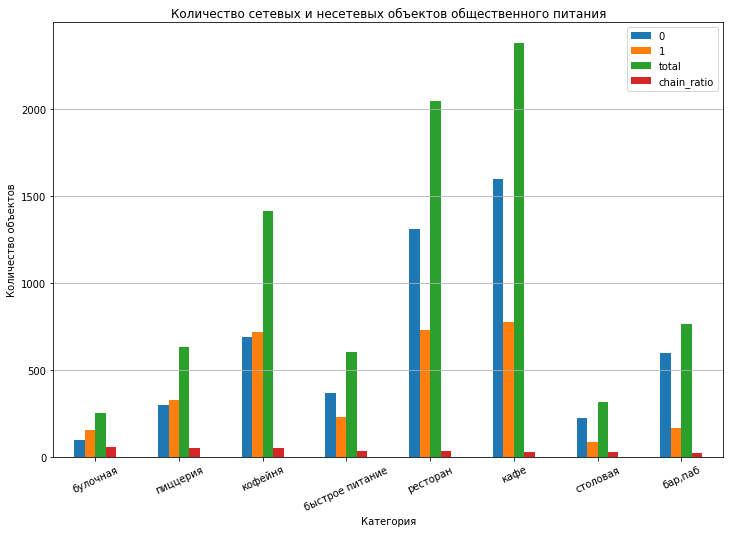

In [33]:
chain_categ_sorted.plot.bar(figsize=(12, 8), title='Количество сетевых и несетевых объектов общественного питания')
plt.xlabel('Категория')
plt.ylabel('Количество объектов')
plt.xticks(rotation=25)
plt.grid(axis='y')
plt.legend() 
plt.show()

Наиболее высокий процент сетевых заведений:

- Булочная: 61.33% (157 из 256) — это самая высокая доля сетевых заведений среди представленных категорий. Это может указывать на популярность сетевых булочных и их распространенность.
- Пиццерия: 52.63% (330 из 633) — также значительная доля сетевых заведений.
- Кофейня: 50.94% (720 из 1413) — также показывает высокий уровень сетевизации.
 
Наименее высокий процент сетевых заведений:

- Бар, паб: 22.09% (169 из 765) — это самая низкая доля сетевых заведений, что может свидетельствовать о том, что бары и пабы чаще являются независимыми заведениями.
- Столовая: 27.92% (88 из 315) — также на низком уровне сетевизации.
 
Категории с высокой долей сетевых заведений:

- В категории булочных, пиццерий и кофеен наблюдается высокая доля сетевых заведений. Это может указывать на то, что такие заведения более склонны к созданию сетей и франчайзинговых моделей.

Категории с низкой долей сетевых заведений:

- Бары и столовые, вероятно, более ориентированы на индивидуальные или местные заведения, что может быть связано с особенностями их предложения и клиентской базой.
 
В наборе данных несетевые заведения значительно преобладают над сетевыми (несетевых заведений 4.209, сетевых 2.205). Это может свидетельствовать о том, что в регионе существует сильная культура независимых заведений. Высокое количество несетевых заведений может говорить о разнообразии и уникальности предложений, что является преимуществом для привлечения клиентов, которые ищут что-то отличное от стандартных сетевых форматов.


---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [34]:
# медиана по категориям
median_seats = df.groupby('category')['seats'].median()

# 2. сортируем категории по медиане
sorted_categ = median_seats.sort_values().index

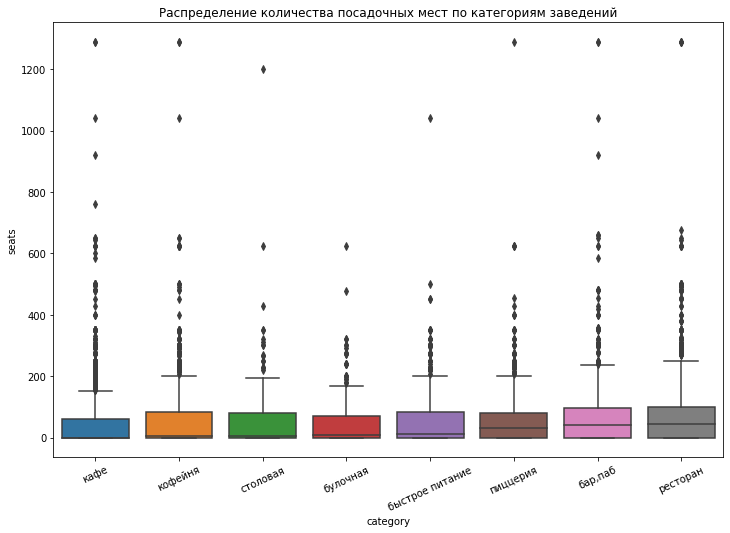

In [35]:
# Ящик с усами
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='category', y='seats', order=sorted_categ)
plt.title('Распределение количества посадочных мест по категориям заведений')
plt.xticks(rotation=25)
plt.show()

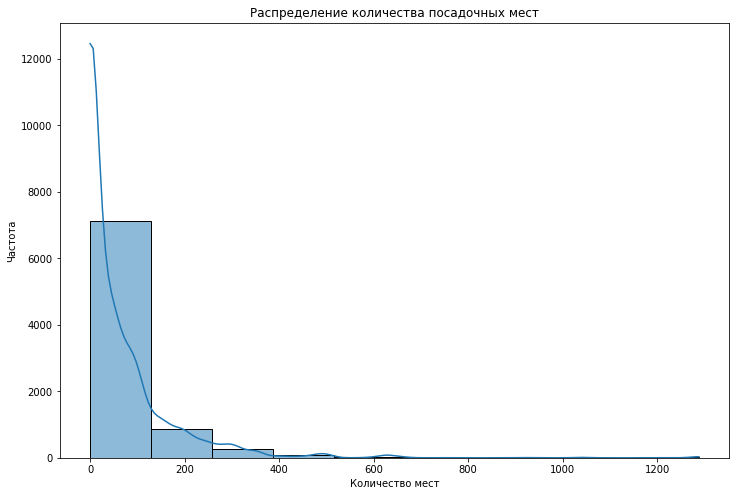

In [36]:
# Гистограмма
plt.figure(figsize=(12, 8))
sns.histplot(df['seats'], bins=10, kde=True)
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество мест')
plt.ylabel('Частота')
plt.show()

1. Выбросы: На боксплоте видно точки, находящиеся далеко за пределами "усов". Это указывает на наличие аномальных значений. Возможно, они связаны с:
- Ошибками в данных (например, неверно введенное количество мест).
- Экстремальными случаями (например, очень крупные заведения).
2. На графике можно увидеть распределение количества посадочных мест по категориям заведений. Вот некоторые типичные значения для каждой категории:
- Кафе: от 50 до 200 мест.
- Ресторан: от 100 до 400 мест.
- Кофейня: от 20 до 100 мест.
- Пиццерия: 50-200 мест.
- Бар, паб: около 100-300 мест.
- Быстрое питание: меньше 100 мест (20-80).
- Булочная: от 20 до 50 мест.
- Столовая: от 50 до 250 мест.
 
Аномальные значения: Если в данных есть заведения с очень большим или очень маленьким количеством мест, это может быть связано с особенностями конкретной категории или ошибками в данных.


---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

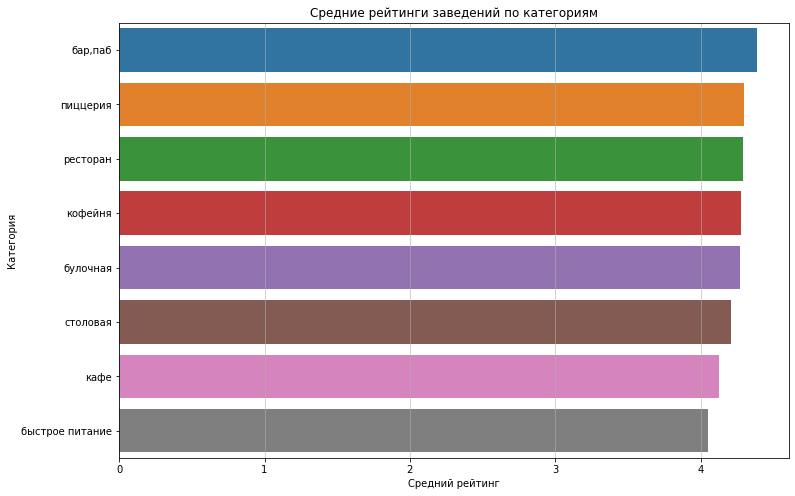

In [37]:
# cортировка категорий по среднему рейтингу
avg_rat = df.groupby('category')['rating'].mean().reset_index()
sorted_categ = avg_rat.sort_values(by='rating', ascending=False)

# столбчатая диаграмма
plt.figure(figsize=(12, 8))
sns.barplot(data=sorted_categ, x='rating', y='category')
plt.title('Средние рейтинги заведений по категориям')
plt.xlabel('Средний рейтинг')
plt.ylabel('Категория')
plt.grid(axis='x', alpha=0.7)
plt.show()

Бары и пабы имеют один из самых высоких средних рейтингов (около 4.4).

Рестораны, пиццерии и булочные также имеют высокие рейтинги, приближающиеся к 4.3, что указывает на положительное восприятие этих типов заведений.

Заведения быстрого питания и кафе имеют более низкие рейтинги, что может говорить о менее позитивном опыте клиентов в этих заведениях.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [38]:
# корреляционная матрица с использованием phik
columns = df[['category', 'district', 'chain', 'seats', 'price', 'is_24_7']]
correlation_matrix = columns.phik_matrix()

correlation_matrix

interval columns not set, guessing: ['chain', 'seats']


,category,district,chain,seats,price,is_24_7
category,1.000000,0.174326,0.265627,0.059661,0.566933,0.244789
district,0.174326,1.000000,0.064233,0.274944,0.202787,0.076392
chain,0.265627,0.064233,1.000000,0.057745,0.218211,0.043414
seats,0.059661,0.274944,0.057745,1.000000,0.089453,0.032312
price,0.566933,0.202787,0.218211,0.089453,1.000000,0.084183
is_24_7,0.244789,0.076392,0.043414,0.032312,0.084183,1.000000


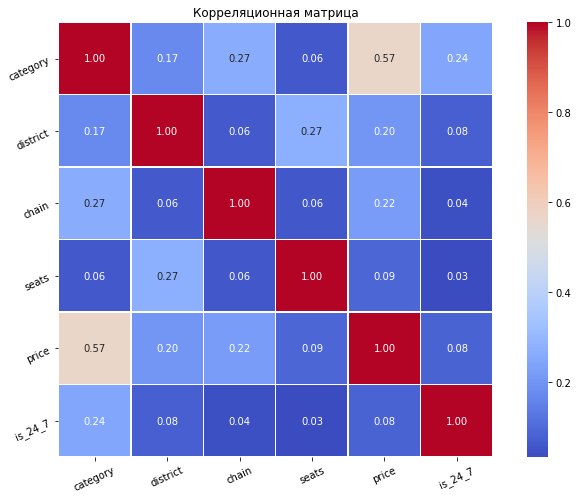

In [39]:
# корреляционная матрица
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Корреляционная матрица')
plt.xticks(rotation=25)
plt.yticks(rotation=25)
plt.show()

1.0 корреляция переменной с самой собой.

Самые высокие значения корреляции:
- category и price: 0.354964
- category и is_24_7: 0.251430
- district и seats: 0.270526

Наибольшая корреляция наблюдается между category и price с коэффициентом 0.354964.

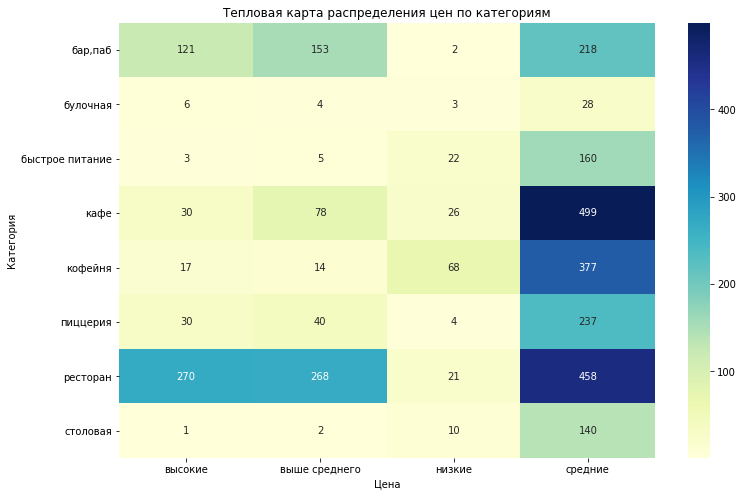

In [40]:
# Сводная таблица
price_distribution = df.groupby(['category', 'price']).size().unstack(fill_value=0)

# Тепловая карта связи цены и категории заведения
plt.figure(figsize=(12, 8))
sns.heatmap(price_distribution, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Тепловая карта распределения цен по категориям')
plt.xlabel('Цена')
plt.ylabel('Категория')
plt.show()

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [41]:
df_chains = df[df['chain'] == 1]

# количество заведений и средний рейтинг по названиям заведений
grouped = df_chains.groupby('name').agg(count=('name', 'size'),
                                        avg_rating=('rating', 'mean'),
                                        category=('category', 'first') ).reset_index()

#  топ-15
top_15 = grouped.sort_values(by='count', ascending=False).head(15)
top_15

,name,count,avg_rating,category
729,шоколадница,120,4.177500,кофейня
335,домино'с_пицца,76,4.169737,пиццерия
331,додо_пицца,74,4.286486,пиццерия
147,one_price_coffee,71,4.064789,кофейня
743,яндекс_лавка,69,3.872464,ресторан
58,cofix,65,4.075385,кофейня
168,prime,50,4.116000,ресторан
664,хинкальная,44,4.322727,быстрое питание
409,кофепорт,42,4.147619,кофейня
418,кулинарная_лавка_братьев_караваевых,39,4.394872,кафе


В списке представлены различные категории заведений:
- Кофейни: "Шоколадница", "One Price Coffee", "Cofix", "Кофепорт", "Cofefest" — показывают, что кофейни занимают значительную долю в рынке.
- Пиццерии: "Домино'с Пицца" и "Додо Пицца" — популярные места для любителей пиццы.
- Рестораны: "Яндекс Лавка", "Prime", "Теремок" — представляют собой более разнообразные предложения в области ресторанного бизнеса.
- Кафе и булочные: "Хинкальная", "Кулинарная лавка братьев Караваевых", "Буханка" и "Му-му" — показывают интерес к традиционным и уютным заведениям.

Средний рейтинг заведений варьируется, но "Додо Пицца" имеет наивысший средний рейтинг (4.286486) среди популярных сетей, что говорит о высоком уровне удовлетворенности клиентов. Также стоит отметить "Кулинарную лавку братьев Караваевых" (4.394872) и "Хинкальную" (4.374359), которые также имеют высокие оценки.

Некоторые заведения, такие как "Яндекс Лавка" (3.870588) и "Чайхана" (3.962069), имеют более низкие средние рейтинги, что может указывать на необходимость улучшения качества обслуживания или предложения.

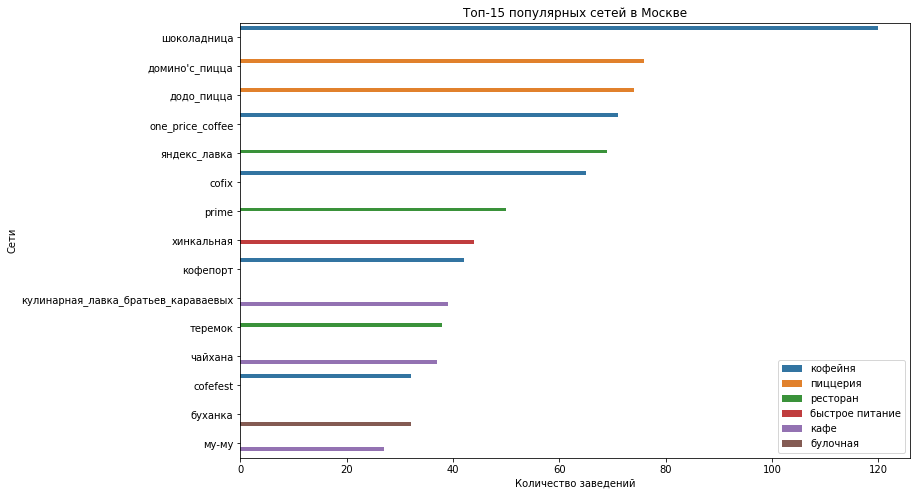

In [42]:
# Столбчатая диаграмма для количества заведений
plt.figure(figsize=(12, 8))
sns.barplot(data=top_15, x='count', y='name', hue='category')
plt.title('Топ-15 популярных сетей в Москве')
plt.xlabel('Количество заведений')
plt.ylabel('Сети')
plt.legend()
plt.show()

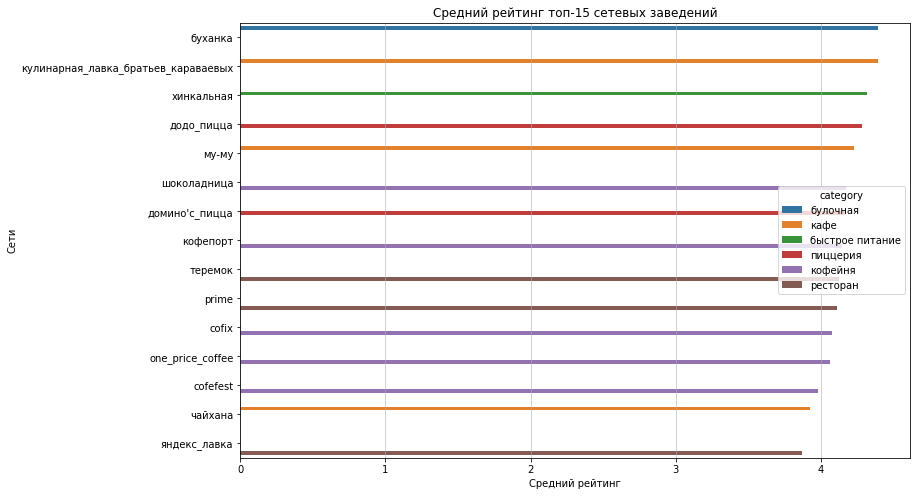

In [43]:
top_15_sorted = top_15.sort_values(by='avg_rating', ascending=False)

# Столбчатая диаграмма среднего рейтинга топ-15 сетей
plt.figure(figsize=(12, 8))
sns.barplot(data=top_15_sorted, x='avg_rating', y='name', hue='category')
plt.title('Средний рейтинг топ-15 сетевых заведений')
plt.xlabel('Средний рейтинг')
plt.ylabel('Сети')
plt.grid(axis='x', alpha=0.7)
plt.show()

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [44]:
# Группируем данные по району и рассчитываем средний чек
avg_bill_district = df.groupby('district')['middle_avg_bill'].mean().reset_index()
avg_bill_district = avg_bill_district.sort_values(by='middle_avg_bill', ascending=False)

# Добавляем столбец для выделения ЦАО
avg_bill_district['cao'] = 'Другие' 
avg_bill_district.loc[avg_bill_district['district'] == 'Центральный адм.окр.', 'cao'] = 'Центральный адм.окр.' 
avg_bill_district

,district,middle_avg_bill,cao
5,Центральный адм.окр.,1191.057547,Центральный адм.окр.
1,Западный адм.окр.,1053.225490,Другие
2,Северный адм.окр.,927.959627,Другие
8,Южный адм.окр.,834.398089,Другие
4,Северо-Западный адм.окр.,822.222930,Другие
0,Восточный адм.окр.,820.626923,Другие
7,Юго-Западный адм.окр.,792.561702,Другие
3,Северо-Восточный адм.окр.,716.611296,Другие
6,Юго-Восточный адм.окр.,654.097938,Другие


Центральный администртивный округ (ЦАО) выделяется на графике с самым высоким средним чеком, что характерно для заведений, располагающихся в центре города. Вероятно, у них более высокая аренда помещений и большее количество туристов и местных жителей с высокой покупательской способностью.

Немного ниже средние чеки у округов, таких как Западный, Северный и Южный, что может указывать на:

-Меньшую конкурентоспособность.
-Сниженную покупательскую способность населения.
-Другую целевую аудиторию.

---


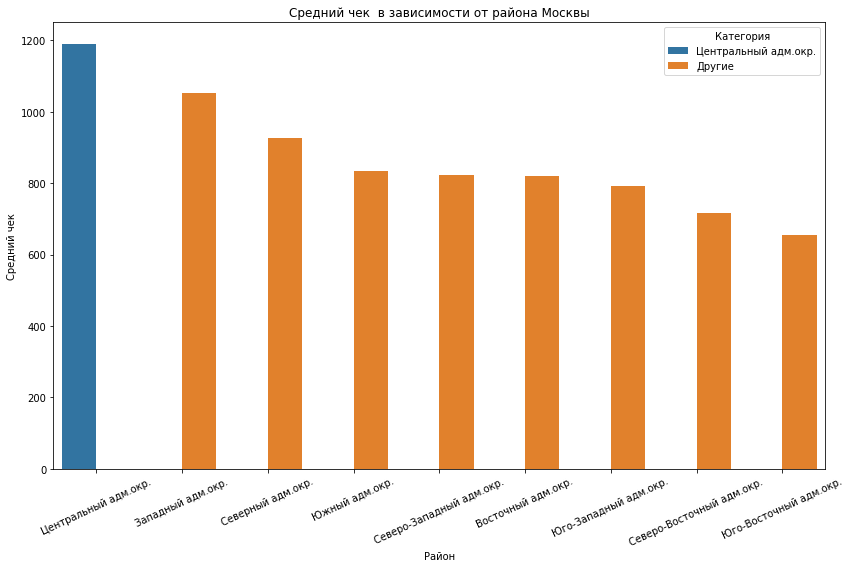

In [45]:
# вариация среднего чека заведения на столбчатой диаграмме
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_bill_district, x='district', y='middle_avg_bill', hue='cao')
plt.title('Средний чек  в зависимости от района Москвы')
plt.xlabel('Район')
plt.ylabel('Средний чек')
plt.legend(title='Категория')
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

In [46]:
# Среднее и медианное значение
avg_bill = df.groupby('district')['middle_avg_bill'].mean().reset_index()
avg_bill['statistic'] = 'Средний чек'

median_bill = df.groupby('district')['middle_avg_bill'].median().reset_index()
median_bill['statistic'] = 'Медианный чек'
# Объединяем данные
new_df = pd.concat([avg_bill, median_bill], ignore_index=True)
new_df.sort_values(by='middle_avg_bill', ascending=False, inplace=True)

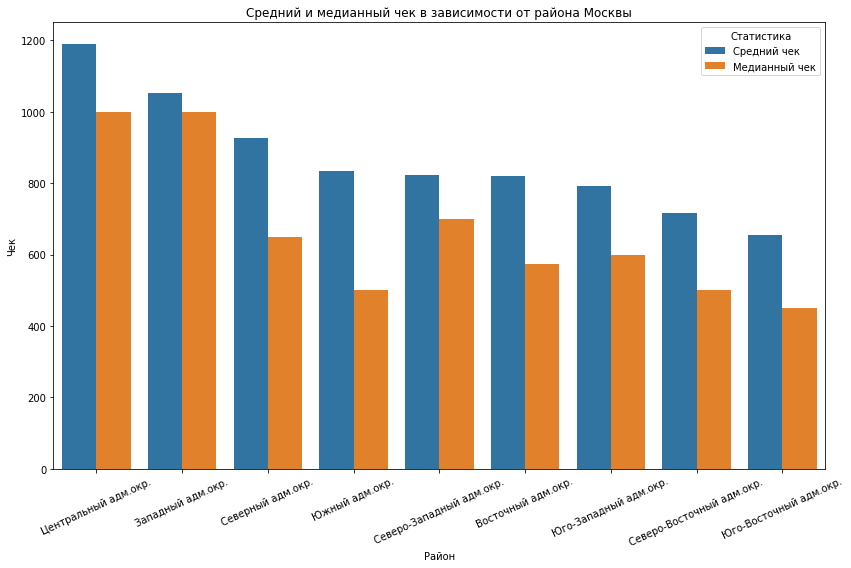

In [47]:
plt.figure(figsize=(12, 8))
sns.barplot(data=new_df, x='district', y='middle_avg_bill', hue='statistic')
plt.title('Средний и медианный чек в зависимости от района Москвы')
plt.xlabel('Район')
plt.ylabel('Чек')
plt.legend(title='Статистика')
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

График демонстрирует, что удаленность от центра города серьезно влияет на цены в заведениях. Центральные районы, как правило, имеют более высокие цены, в то время как периферийные зоны предлагают более доступные варианты, что соответствует ожидаемым экономическим закономерностям.

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

Общее количество заведений в городе демонстрирует разнообразие предложений, удовлетворяющее различные потребности потребителей. В Центральном административном округе сосредоточено наибольшее количество заведений (2242), что связано с высокой концентрацией населения и туристов. Северный и Южный округа также имеют значительное количество заведений (900 и 892 соответственно), указывая на развитие инфраструктуры.

Северо_Восточный и Западный округа (891 и 851) показывают активное присутствие заведений, предлагая разнообразие для местных жителей. Восточный и Юго-Восточный округа (798 и 714) находятся на среднем уровне, что открывает возможности для роста.

В Центральном округе рестораны (670) лидируют по количеству, что говорит о высоком интересе к качественной еде. Кафе (464) и кофейни (428) также популярны, подчеркивая предпочтение потребителей к неформальным местам. Бары и пабы (364) указывают на активность ночной жизни.

Несетевые заведения (примерно 59.3%) значительно преобладают над сетевыми (40.7%), что свидетельствует о сильной культуре независимых заведений. Высокая конкуренция между сетевыми и несетевыми форматами в категориях, таких как кофейни и пиццерии, указывает на успешную борьбу независимых заведений за внимание клиентов. Менее популярные категории, такие как булочные и столовые, требуют пересмотра маркетинговых стратегий для повышения интереса.

На боксплоте были выявлены выбросы, указывающие на аномальные значения, которые могут быть вызваны ошибками в данных или экстремальными случаями (например, крупные заведения). Типичные значения количества посадочных мест по категориям заведений:

- Кафе: 50-200 мест
- Ресторан: 100-400 мест
- Кофейня: 20-100 мест
- Пиццерия: 50-200 мест
- Бар, паб: 100-300 мест
- Быстрое питание: 20-80 мест
- Булочная: 20-50 мест
- Столовая: 50-250 мест

Аномалии могут быть связаны с особенностями категорий или ошибками. Средние значения и медианы помогут понять нормы для заведений. Бары и пабы имеют высокий средний рейтинг (около 4.4), в то время как рестораны, пиццерии и булочные также показывают хорошие результаты (около 4.3). Заведения быстрого питания и кафе имеют более низкие рейтинги.

Наиболее высокая корреляция наблюдается между категорией и ценой (0.354964). 

В списке представлены различные категории заведений:

Кофейни: "Шоколадница", "One Price Coffee", "Cofix", "Кофепорт", "Cofefest" занимают значительную долю на рынке.
Пиццерии: "Домино'с Пицца" и "Додо Пицца" популярны среди любителей пиццы.
Рестораны: "Яндекс Лавка", "Prime", "Теремок" предлагают разнообразные блюда.
Кафе и булочные: "Хинкальная", "Кулинарная лавка братьев Караваевых", "Буханка" привлекают любителей традиционной кухни.
Средний рейтинг варьируется, при этом "Додо Пицца" имеет наивысший рейтинг (4.29), а "Кулинарная лавка братьев Караваевых" (4.39) и "Хинкальная" (4.37) также показывают высокие оценки. Заведения с более низкими рейтингами, такие как "Яндекс Лавка" (3.87) и "Чайхана" (3.96), могут нуждаться в улучшении качества обслуживания.

Центральный административный округ выделяется самым высоким средним чеком, что связано с высокой арендой и покупательской способностью. В округах, таких как Северо-Восточный и Юго-Восточный, средние чеки ниже, что может указывать на меньшую конкурентоспособность и другую целевую аудиторию. График показывает, что удаленность от центра влияет на цены: центральные районы имеют более высокие цены, а периферийные — более доступные. 

## 4. Итоговый вывод и рекомендации



В рамках исследования рынка общественного питания в Москве мы провели анализ различных категорий заведений, их характеристик, рейтингов и ценовых категорий. Это поможет инвесторам из фонда Shut Up and Take My Money выбрать оптимальный формат заведения (кафе, ресторан или бар) и определить его местоположение, меню и ценовую стратегию.

**Главные выводы**
- *Категории заведений*: В Москве выделяются несколько ключевых категорий, включая кофейни, пиццерии, рестораны и бары. Каждая из этих категорий имеет свою долю рынка и уровень популярности среди жителей и туристов.

- *Рейтинги*: Высокие средние рейтинги у таких заведений, как "Додо Пицца" и "Кулинарная лавка братьев Караваевых", показывают, что они успешно удовлетворяют потребности клиентов. Это может служить ориентиром для выбора концепции нового заведения. Заведения с низкими рейтингами, например "Яндекс Лавка", могут быть примерами того, что следует избегать.

- *Ценовые категории*: Центральный административный округ демонстрирует высокие средние чеки, что связано с высокой покупательской способностью и спросом на качественные заведения. Периферийные районы предлагают более доступные цены, что может быть интересным для создания более демократичного заведения.

- *Корреляции*: Наблюдается значительная связь между типом заведения и его ценовой категорией. Например, рестораны и бары в центре имеют более высокие цены, в то время как кофейни и пиццерии в периферийных районах могут предложить более доступные варианты.

**Рекомендации на основе анализа данных**
- *Определение концепции*: На основе анализа рынка, инвесторам стоит рассмотреть открытие заведения, которое сочетает в себе элементы кафе и бара. Это может привлечь широкий круг клиентов, включая молодежь и работающих профессионалов.

- *Выбор местоположения*: Рекомендуется рассмотреть открытие заведения в Центральном административном округе, где высокая проходимость и покупательская способность. Однако также стоит обратить внимание на перспективные районы с растущим населением и недостатком качественных заведений.

- *Ценовая стратегия*: Для привлечения клиентов в новом заведении можно использовать гибкую ценовую стратегию, предлагая как доступные, так и более премиум предложения. Это позволит охватить различные сегменты аудитории.

- *Разработка уникального меню*: Меню должно быть разнообразным, включать как классические, так и оригинальные блюда и напитки, чтобы удовлетворить различные предпочтения клиентов. Также стоит учитывать тренды в области здорового питания и вегетарианства.
- *Маркетинг и продвижение*: Используйте успешные примеры заведений с высокими рейтингами для формирования эффективной маркетинговой стратегии. Реклама через социальные сети и локальные мероприятия может помочь привлечь внимание к новому заведению.

Эти рекомендации помогут инвесторам сделать обоснованный выбор и создать успешное заведение общественного питания в Москве. 

